# Word Counter and Word Cloud
Here I will take a text file and attempt to create a list of words that are significant in sales transactions.

### Reading in the Excel document

In [18]:
import pandas as pd

df = pd.read_excel('Subset Notes.xlsx')
df2 = pd.read_excel('information_notes.xlsx')

### Creating DataFrames

In [19]:
feedback = pd.DataFrame(df, columns = ['PURPOSE', 'USERMEMO'])
feedback.head()

,PURPOSE,USERMEMO
0,past due reminder,Emailed Leon a request for payment on the past...
1,past due reminder,Emailed ap a request for payment on the past d...
2,Activated account,Activated account - credit limit $15k based on...
3,Collection note,emd for update on payment for past due invoices
4,Collection note,emd for payment on February invoice - copied i...


In [20]:
information = pd.DataFrame(df2,columns = ['CustomerType','InformationGained'])
information.head()

,CustomerType,InformationGained
0,Unknown,2021 Forecast Had a discussion with Carles ab...
1,Unknown,21B0C Had a conversation with Ignacio (Design...
2,Key,All Saints Bioretention - Gary said they did n...
3,Strategic,Allan Myers Materials - High Rise Pad/Powhatan...
4,Unknown,Asphalt Had a great discussion with Kevin and...


### What to do
- feed dataframe into a function that counts words
- use words for word cloud
- get rid of junk words (a, and)
- print another word cloud
This is a preview of what is to come

## Word Counter Function
This is a word counter function that I found at **https://stackoverflow.com/questions/18936957/count-distinct-words-from-a-pandas-data-frame**

In [21]:
import pandas as pd

r1=['My nickname is ft.jgt','Someone is going to my place']
df3=pd.DataFrame(r1,columns=['text'])
df3['text'].str.lower().str.split()
results = set()
from collections import Counter
results = Counter()
df3['text'].str.lower().str.split().apply(results.update)
print(results)

Counter({'my': 2, 'is': 2, 'nickname': 1, 'ft.jgt': 1, 'someone': 1, 'going': 1, 'to': 1, 'place': 1})


### Let's try it for our own purposes

In [34]:
information['InformationGained'].dropna().str.lower().str.split()
results = set()
from collections import Counter
results = Counter()
information['InformationGained'].dropna().str.lower().str.split().apply(results.update)
print(results)

Counter({'the': 310, 'to': 273, 'and': 185, 'in': 138, 'of': 136, 'a': 125, 'with': 120, 'for': 116, 'they': 115, 'on': 99, 'he': 98, 'is': 95, 'that': 79, 'have': 73, '-': 70, 'will': 70, 'be': 55, 'this': 53, 'i': 52, 'we': 49, 'was': 48, 'their': 46, 'are': 46, 'at': 45, 'project': 40, 'had': 39, 'up': 36, 'been': 36, 'our': 35, 'but': 32, 'has': 32, 'it': 31, 'information-': 31, 'work': 30, 'stone': 30, 'about': 29, 'from': 29, 'out': 29, 'material': 29, 'as': 28, 'next': 28, 'get': 27, 'tons': 26, 'would': 25, 'him': 24, 'not': 23, 'an': 23, 'which': 23, 'over': 22, 'his': 22, 'if': 22, 'them': 21, 'spoke': 21, 'some': 20, 'what': 18, 'so': 18, 'said': 17, 'projects': 17, 'should': 17, 'me': 16, 'job/project:': 16, 'project.': 15, 'able': 15, 'currently': 15, 'also': 15, 'working': 14, 'more': 14, 'any': 14, 'down': 14, 'two': 14, 'job': 14, 'company': 14, 'can': 13, 'there': 13, 'asked': 13, 'new': 13, 'use': 13, 'week': 13, 'great': 13, 'back': 13, 'by': 13, 'start': 13, 'confid

### Word Cloud with words from above
Now I am going to make a word cloud of all the words gathered from the `InformationGathered` column. This is not necessarily a final product, but shows us what we can do with a dataframe of positive call data and a dataframe of negative call data. Once we get some call data that is filtered by the feedback, we can search for key words that are crucial to running a good call.

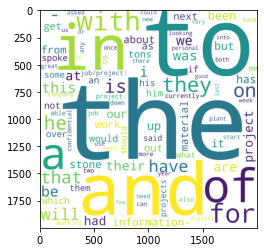

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=2000,
               height=2000, max_words=100,relative_scaling=0.5,
               normalize_plurals=False).generate_from_frequencies(results)
plt.imshow(wc)

### Deleting junk words
There were too many junkwords in the Word Cloud above, so I will delete some of them. There is a way to tokenize words and take them out (pronouns, etc.)
`nltk` and `bagofwords`
- https://scikit-learn.org/stable/modules/feature_extraction.html
- https://www.nltk.org/

In [1]:
# Slow way of doing it

new_results = results
del new_results['the']
del new_results['and']
del new_results['to']
del new_results['in']
del new_results['of']
del new_results['a']
del new_results['with']
del new_results['for']
del new_results['they']
del new_results['on']

NameError: name 'results' is not defined

### New Word Cloud

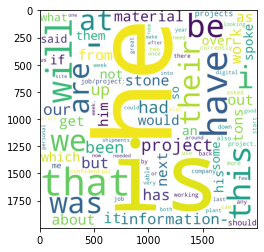

In [40]:
wc = WordCloud(background_color="white",width=2000,
               height=2000, max_words=100,relative_scaling=0.5,
               normalize_plurals=False).generate_from_frequencies(new_results)
plt.imshow(wc)

## Sentiment analysis using TextBlob

In [1]:
from textblob import TextBlob